# EDA

In [3]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Here, I am simply viewing the information found in the dataset and trying to understand the variables. At the same time,
# I'll be cleaning up the dataframe.
Data1 = pd.read_csv("../data/processed/rec1data.csv")
Data1.info() 
# crime01, crime02.. are
# simplifications of the types of crimes committed.
Data1.head() 
# According to the codebook, the numbers presented within the demographic 
# characteristics is also a simplification for gender, status, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1003 non-null   int64
 1   id          1003 non-null   int64
 2   rid         1003 non-null   int64
 3   sex         1003 non-null   int64
 4   birth       1003 non-null   int64
 5   race        1003 non-null   int64
 6   educ        1003 non-null   int64
 7   marital     1003 non-null   int64
 8   children    1003 non-null   int64
 9   occupat     1003 non-null   int64
 10  arrests     1003 non-null   int64
 11  jail        1003 non-null   int64
 12  crime01     1003 non-null   int64
 13  crime02     1003 non-null   int64
 14  crime03     1003 non-null   int64
 15  crime04     1003 non-null   int64
 16  crime05     1003 non-null   int64
 17  crime06     1003 non-null   int64
 18  crime07     1003 non-null   int64
 19  crime08     1003 non-null   int64
 20  crime09     1003 non-null   in

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime05,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,0
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Even though all the following data points/values are integers, most are categorical, so we shall change the following:
Data1['sex'] = Data1['sex'].astype('category')
Data1['race'] = Data1['race'].astype('category')
Data1['marital'] = Data1['marital'].astype('category')
Data1['occupat'] = Data1['occupat'].astype('category')
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1003 non-null   int64   
 1   id          1003 non-null   int64   
 2   rid         1003 non-null   int64   
 3   sex         1003 non-null   category
 4   birth       1003 non-null   int64   
 5   race        1003 non-null   category
 6   educ        1003 non-null   int64   
 7   marital     1003 non-null   category
 8   children    1003 non-null   int64   
 9   occupat     1003 non-null   category
 10  arrests     1003 non-null   int64   
 11  jail        1003 non-null   int64   
 12  crime01     1003 non-null   int64   
 13  crime02     1003 non-null   int64   
 14  crime03     1003 non-null   int64   
 15  crime04     1003 non-null   int64   
 16  crime05     1003 non-null   int64   
 17  crime06     1003 non-null   int64   
 18  crime07     1003 non-null   int64   
 19  crime0

In [6]:
# Now that I have a general idea of what Data Record 1 holds, lets take a look at
# what Data Record 2 has.
Data2 = pd.read_csv("../data/processed/rec2data.csv")
index = Data2.index
rows = len(index)
Data2.head()

,Unnamed: 0,id,rid,pub_intox,pet_larc,misc,assault,arson,rape,forgery,...,crim_poss_weap,crim_poss_instr,obst_gov,res_arrest,escape,crim_poss_stolen,reck_endanger,crim_neg_hom,youth_off,crim_tresspasss
0,1,1,992,5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,2,992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,992,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# Seems like the Data Record 2 contains the rest of the offences that isn't provided in the first record, so I'll
# merge the two to get a full picture.
Data = pd.merge(Data1, Data2, how='inner', on=["id"])

Data['Duplicated'] = Data.duplicated(keep=False)
Data_final = Data[~Data['Duplicated']]
Data_final

,Unnamed: 0_x,id,rid_x,sex,birth,race,educ,marital,children,occupat,...,crim_poss_instr,obst_gov,res_arrest,escape,crim_poss_stolen,reck_endanger,crim_neg_hom,youth_off,crim_tresspasss,Duplicated
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,False
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,False
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,False
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,False
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,999,991,1,21,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,False
999,1000,1000,991,1,48,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,False
1000,1001,1001,991,1,46,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,False
1001,1002,1002,991,1,42,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,False


In [52]:
# Looks like I accidentally doubled my information, so perhaps I should rename a few of the columns in Data2
# since a word-code is used for Data1 and the remainder of the offences is in Data2.
# I'm not sure how to merge certain aspects, without the doubling, so I'll drop some columns from rec2data.
df1 = Data1.drop("Unnamed: 0", axis=1)
df2 = Data2.drop("Unnamed: 0", axis=1)
DataFrame1 = df1.drop(columns=['sex','birth', 'race', 'educ', 'marital', 'children', 'occupat', 'arrests', 'jail','rid'])
DataFrame2 = df2.drop(columns=['rid', 'pub_intox', 'pet_larc', 'misc', 'assault', 'arson', 'rape', 'forgery',
                         'consp', 'mvv', 'narc', 'viol_prob', 'viol_parole', 'gambling', 'grand_larc'])
Data02 = DataFrame2.rename(columns={"robbery": "crime15", 
                               "burglary": "crime16", 
                               "sex_off": "crime17", 
                               "crim_poss_weap": "crime18", 
                               "crim_poss_instr": "crime19", 
                               "obst_gov": "crime20", 
                               "res_arrest": "crime21", 
                               "escape": "crime22", 
                               "crim_poss_stolen": "crime23", 
                               "reck_endanger": "crime24", 
                               "crim_neg_hom": "crime25", 
                               "youth_off": "crime26", 
                               "crim_tresspasss": "crime27"})

# Now, lets merge the two again, but this time using "inner" to remove the unwanted columns from Data02.
NewData = pd.merge(DataFrame1, Data02, on=["id"], how='inner')
NewData.info()
NewData['Duplicated'] = Data.duplicated(keep=False)
Data_final = NewData[~NewData['Duplicated']]
Data_final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       1003 non-null   int64
 1   crime01  1003 non-null   int64
 2   crime02  1003 non-null   int64
 3   crime03  1003 non-null   int64
 4   crime04  1003 non-null   int64
 5   crime05  1003 non-null   int64
 6   crime06  1003 non-null   int64
 7   crime07  1003 non-null   int64
 8   crime08  1003 non-null   int64
 9   crime09  1003 non-null   int64
 10  crime10  1003 non-null   int64
 11  crime11  1003 non-null   int64
 12  crime12  1003 non-null   int64
 13  crime13  1003 non-null   int64
 14  crime14  1003 non-null   int64
 15  crime15  1003 non-null   int64
 16  crime16  1003 non-null   int64
 17  crime17  1003 non-null   int64
 18  crime18  1003 non-null   int64
 19  crime19  1003 non-null   int64
 20  crime20  1003 non-null   int64
 21  crime21  1003 non-null   int64
 22  crime22  1003 non-null  

,id,crime01,crime02,crime03,crime04,crime05,crime06,crime07,crime08,crime09,...,crime19,crime20,crime21,crime22,crime23,crime24,crime25,crime26,crime27,Duplicated
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,5,61,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
999,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1000,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1001,1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [53]:
# This will give us an idea if there are any duplicates within the data.
if len(NewData[NewData.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(NewData[NewData.duplicated()]))
    print(NewData[NewDAta.duplicated(keep=False)].sort_values(by=list(NewData.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [85]:
# Psych Data analysis - import and visualization
pdata = pd.read_csv("../data/processed/psychdata.csv")
pdata.info()
pdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4548 non-null   int64 
 1   id            4548 non-null   int64 
 2   contact       4548 non-null   int64 
 3   date_contact  4548 non-null   int64 
 4   facility      4548 non-null   int64 
 5   address       4548 non-null   object
 6   diagnosis     4548 non-null   object
 7   service       4548 non-null   int64 
 8   date_term     4548 non-null   int64 
 9   reason_term   4548 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 355.4+ KB


,Unnamed: 0,id,contact,date_contact,facility,address,diagnosis,service,date_term,reason_term
0,1,1,1,600804,1,100,103,0,600808,0
1,2,1,2,600809,2,100,715,1,601130,9
2,3,1,3,640320,1,100,715,0,640401,0
3,4,1,4,640910,2,100,715,0,641027,9
4,5,1,5,641109,1,100,103,0,641113,0


In [86]:
# Now, this data is important, but it has too much information. 
# For this research, I will focus on the most frequent diagnosis given and see if it can be indicative of the type of crime
# associated with it. 
# Find the most common diagnosis.
n = 10
pdata['diagnosis'].value_counts()[:n].index.tolist()

# According to the codebook, the list below indicates the following:
# Alcohol addiction; Acute alcohol intoxication; Drug Dependence, Opium, Opium Alkaloids and Their Derivatives; 
# Acute Brain Syndrome Alcohol Intoxication (Pathological Intoxication); Addiction alcoholism; 
# Schizophrenia, Chronic Undifferentiated; Neurosis, Depressive; Undetermined; 
# Schizophrenia, Paranoid (Chr. Par. Schiz. residual type); Alcohol (Simple Drunkenness)
# There seems to be a theme for alcohol, but I want to focus on Schizophrenia. 

['755', '238', '758', '103', '715', '444', '617', '901', '436', '265']

In [107]:
# Let's do some clean up of the psychiatric data. I only want data with the diagnosis.
pdata.drop(pdata[pdata.diagnosis != '444'].index, inplace=True)
aa_data = pdata.drop(columns=['contact','date_contact', 'facility', 'address', 'service', 'date_term', 'reason_term'])
Schizodata = aa_data.drop("Unnamed: 0", axis=1)
Schizodata


,id,diagnosis
374,28,444
375,28,444
377,28,444
380,28,444
381,28,444
...,...,...
4492,967,444
4502,975,444
4503,975,444
4504,975,444


In [106]:
# Let's merge the Data_final and AAdata!
Schizocrimes = pd.merge(Data_final, Schizodata, how='right')
Schizocrimes

,id,crime01,crime02,crime03,crime04,crime05,crime06,crime07,crime08,crime09,...,crime20,crime21,crime22,crime23,crime24,crime25,crime26,crime27,Duplicated,diagnosis
0,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,False,444
1,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,False,444
2,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,False,444
3,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,False,444
4,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,False,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,967,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,444
130,975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,444
131,975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,444
132,975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,444


In [108]:
# Now let's visualize the number of crimes, the total amount of each crime column, and so on.

Schizocrimes['crime_num'] = (Schizocrimes.iloc[:,1:28] != 0).sum(axis=1)
Schizocrimes['crime_num'].describe()
# Looks like somebody was convicted for 7 crimes, but some people were convicted of zero crimes?
# I didn't think anybody would be diagnosed here with no convictions. Will have to look into this later.

count    134.000000
mean       1.000000
std        1.681389
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: crime_num, dtype: float64

array([[<AxesSubplot:title={'center':'crime_num'}>]], dtype=object)

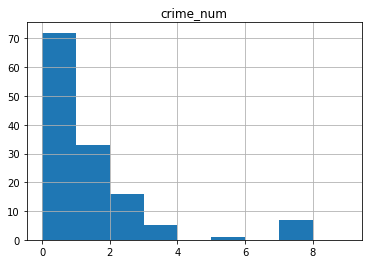

In [109]:
Schizocrimes.hist(column = "crime_num", bins = range(10))
# There seems to be at most 2 people who were convicted of a crime. Now I just need to figure out which crimes were most
# frequent.

In [110]:
# I couldn't think of a way to show the data fastest, so we will just do this for all of the columns.
# I will come back to this.
total = Schizocrimes['crime01'].sum()
print(total)
total2 = Schizocrimes['crime02'].sum()
print(total2)
total3 = Schizocrimes['crime03'].sum()
print(total3)
total4 = Schizocrimes['crime04'].sum()
print(total4)
total5 = Schizocrimes['crime05'].sum()
print(total5)
total6 = Schizocrimes['crime06'].sum()
print(total6)
total7 = Schizocrimes['crime07'].sum()
print(total7)
total8 = Schizocrimes['crime08'].sum()
print(total8)
total9 = Schizocrimes['crime09'].sum()
print(total9)
total10 = Schizocrimes['crime10'].sum()
print(total10)
total11 = Schizocrimes['crime11'].sum()
print(total11)
total12 = Schizocrimes['crime12'].sum()
print(total12)
total13 = Schizocrimes['crime13'].sum()
print(total13)
total14 = Schizocrimes['crime14'].sum()
print(total14)
total15 = Schizocrimes['crime15'].sum()
print(total15)
total16 = Schizocrimes['crime16'].sum()
print(total16)
total17 = Schizocrimes['crime17'].sum()
print(total17)
total18 = Schizocrimes['crime18'].sum()
print(total18)
total19 = Schizocrimes['crime19'].sum()
print(total19)
total20 = Schizocrimes['crime20'].sum()
print(total20)
total21 = Schizocrimes['crime21'].sum()
print(total21)
total22 = Schizocrimes['crime22'].sum()
print(total22)
total23 = Schizocrimes['crime23'].sum()
print(total23)
total24 = Schizocrimes['crime24'].sum()
print(total24)
total25 = Schizocrimes['crime25'].sum()
print(total25)
total26 = Schizocrimes['crime26'].sum()
print(total26)
total27 = Schizocrimes['crime27'].sum()
print(total27)
# Seems like the most common are Alochol intoxication, criminal possession of dangerous drugs,
# burglary, and generally narcotics and larcency.

776
189
8
8
8
1
1
0
0
0
0
0
0
0
8
23
0
0
4
0
1
5
0
0
1
0
0


# Analysis Pipeline

# 1. Load Data

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
# Loading Data
Data1 = pd.read_csv("../data/processed/rec1data.csv")
Data2 = pd.read_csv("../data/processed/rec2data.csv")
pdata = pd.read_csv("../data/processed/psychdata.csv")

# 2. Clean Data

In [24]:
# Cleaning up Data1 and Data2

df1 = Data1.drop("Unnamed: 0", axis=1)
df2 = Data2.drop("Unnamed: 0", axis=1)
DataFrame1 = df1.drop(columns=['sex','birth', 'race', 'educ', 'marital', 'children', 'occupat', 'arrests', 'jail','rid'])
DataFrame2 = df2.drop(columns=['rid', 'pub_intox', 'pet_larc', 'misc', 'assault', 'arson', 'rape', 'forgery',
                         'consp', 'mvv', 'narc', 'viol_prob', 'viol_parole', 'gambling', 'grand_larc'])
Data02 = DataFrame2.rename(columns={"robbery": "crime15", 
                               "burglary": "crime16", 
                               "sex_off": "crime17", 
                               "crim_poss_weap": "crime18", 
                               "crim_poss_instr": "crime19", 
                               "obst_gov": "crime20", 
                               "res_arrest": "crime21", 
                               "escape": "crime22", 
                               "crim_poss_stolen": "crime23", 
                               "reck_endanger": "crime24", 
                               "crim_neg_hom": "crime25", 
                               "youth_off": "crime26", 
                               "crim_tresspasss": "crime27"})

# Cleaning up PsychData
pdata.drop(pdata[pdata.diagnosis != '444'].index, inplace=True)
aa_data = pdata.drop(columns=['contact','date_contact', 'facility', 'address', 'service', 'date_term', 'reason_term'])
Schizodata = aa_data.drop("Unnamed: 0", axis=1)
Schizodata


# 3. Process Data

In [25]:
# Creating variables
Schizocrimes['crime_num'] = (Schizocrimes.iloc[:,1:28] != 0).sum(axis=1)
Schizocrimes['crime_num'].describe()

# 4. Wrangle Data

In [ ]:
# Restructuring.

#Merging data1 and data2.
NewData = pd.merge(DataFrame1, Data02, on=["id"], how='inner') # Note that this was performed after dropping columns.
NewData.info()
NewData['Duplicated'] = Data.duplicated(keep=False)
Data_final = NewData[~NewData['Duplicated']]
Data_final

#Merging diagnosis and crimes
Schizocrimes = pd.merge(Data_final, Schizodata, how='right')
Schizocrimes